## ML at Scale Final Code

**Practical 1**

Creating lists of lists for the movies and users and mapping the Ids to indices. I also split the data here to prepare for training.

In [ ]:
##############final index + split#############
import pandas as pd
import numpy as np

# Read ratings.csv file
ratings = pd.read_csv('/content/ratings.csv')

# Create user and movie mappings
user_to_idx = {}
movie_to_idx = {}
id_to_user = []
id_to_movie = []

for row in ratings.itertuples():
    user_id = row.userId
    movie_id = row.movieId

    # Map user_id to an index
    if user_id not in user_to_idx:
        user_idx = len(user_to_idx)
        user_to_idx[user_id] = user_idx
        id_to_user.append(user_id)

    # Map movie_id to an index
    if movie_id not in movie_to_idx:
        movie_idx = len(movie_to_idx)
        movie_to_idx[movie_id] = movie_idx
        id_to_movie.append(movie_id)

# Initialize empty lists for each user and movie
ratings_by_users = [[] for _ in range(len(user_to_idx))]
ratings_by_movies = [[] for _ in range(len(movie_to_idx))]

# Append ratings to lists
for row in ratings.itertuples():
    user = row.userId
    movie = row.movieId
    rating = row.rating

    user_idx = user_to_idx[user]
    movie_idx = movie_to_idx[movie]

    ratings_by_users[user_idx].append((movie_idx, rating))
    ratings_by_movies[movie_idx].append((user_idx, rating))

# Initialize training and testing sets
ratings_by_users_train = [[] for _ in range(len(ratings_by_users))]
ratings_by_users_test = [[] for _ in range(len(ratings_by_users))]

ratings_by_movies_train = [[] for _ in range(len(ratings_by_movies))]
ratings_by_movies_test = [[] for _ in range(len(ratings_by_movies))]

# Split the data into training and testing sets (80/20 split)
for user_idx, user_ratings in enumerate(ratings_by_users):
    np.random.shuffle(user_ratings)  # Shuffle the ratings for each user
    split_idx = int(len(user_ratings) * 0.8)  # Calculate split index

    # Split ratings for training and testing
    ratings_by_users_train[user_idx] = user_ratings[:split_idx]
    ratings_by_users_test[user_idx] = user_ratings[split_idx:]

# Similarly, split the ratings by movies if needed
for movie_idx, movie_ratings in enumerate(ratings_by_movies):
    np.random.shuffle(movie_ratings)  # Shuffle the ratings for each movie
    split_idx = int(len(movie_ratings) * 0.8)  # Calculate split index

    # Split ratings for training and testing
    ratings_by_movies_train[movie_idx] = movie_ratings[:split_idx]
    ratings_by_movies_test[movie_idx] = movie_ratings[split_idx:]


# Check the number of users and movies in the train and test sets
train_users_size = len(ratings_by_users_train)
test_users_size = len(ratings_by_users_test)

train_movies_size = len(ratings_by_movies_train)
test_movies_size = len(ratings_by_movies_test)

# print(f"Train set size (users): {train_users_size}, Test set size (users): {test_users_size}")
# print(f"Train set size (movies): {train_movies_size}, Test set size (movies): {test_movies_size}")

In [ ]:
movie_to_idx[5816]

763

In [ ]:
print(f"Train set size (users): {train_users_size}, Test set size (users): {test_users_size}")
print(f"Train set size (movies): {train_movies_size}, Test set size (movies): {test_movies_size}")

Train set size (users): 162541, Test set size (users): 162541
Train set size (movies): 59047, Test set size (movies): 59047


In [ ]:
ratings_by_users_train[50]

[(1444, 5.0),
 (847, 4.0),
 (2977, 5.0),
 (990, 3.0),
 (1654, 2.5),
 (2895, 3.5),
 (1453, 4.5),
 (723, 5.0),
 (2899, 5.0),
 (2038, 5.0),
 (2932, 0.5),
 (2959, 4.0),
 (2550, 3.5),
 (757, 1.5),
 (116, 5.0),
 (2950, 4.0),
 (49, 3.5),
 (399, 0.5),
 (2285, 2.5),
 (182, 5.0),
 (335, 3.0),
 (1541, 3.0),
 (277, 5.0),
 (461, 3.0),
 (2896, 4.0),
 (2927, 5.0),
 (2957, 4.5),
 (1692, 4.0),
 (2082, 5.0),
 (2963, 0.5),
 (1239, 3.5),
 (2915, 4.0),
 (2925, 2.5),
 (1027, 3.5),
 (997, 4.0),
 (1590, 1.5),
 (1839, 2.5),
 (1028, 5.0),
 (1496, 1.0),
 (1100, 4.5),
 (2052, 5.0),
 (2939, 4.0),
 (2913, 1.5),
 (404, 4.0),
 (2911, 2.5),
 (2918, 4.0),
 (1602, 3.5),
 (1570, 5.0),
 (2047, 5.0),
 (2518, 5.0),
 (2914, 3.0),
 (1617, 4.5),
 (1480, 3.5),
 (1606, 0.5),
 (417, 3.0),
 (1604, 4.0),
 (1214, 5.0),
 (2951, 4.5),
 (187, 1.5),
 (673, 4.0),
 (1864, 3.5),
 (229, 3.0),
 (836, 3.5),
 (112, 0.5),
 (856, 5.0),
 (1110, 5.0),
 (2714, 5.0),
 (1190, 5.0),
 (2936, 4.5),
 (2980, 0.5),
 (1572, 4.0),
 (687, 4.5),
 (2929, 5.0),


In [ ]:
# Check train-test split sizes for users and movies
train_user_size = sum([len(x) for x in ratings_by_users_train])
test_user_size = sum([len(x) for x in ratings_by_users_test])
train_movie_size = sum([len(x) for x in ratings_by_movies_train])
test_movie_size = sum([len(x) for x in ratings_by_movies_test])

print(f"Train size (users): {train_user_size}, Test size (users): {test_user_size}")
print(f"Train size (movies): {train_movie_size}, Test size (movies): {test_movie_size}")

Train size (users): 19936012, Test size (users): 5064083
Train size (movies): 19971697, Test size (movies): 5028398


**Practical 1**

used counters to find the frequency and count for the users and movies the show the ratings distributions and plotting it to show that it follows the Law distribution.

In [ ]:
import collections
from collections import Counter as counter

# counter to calculate thde degrees for both users & movies
user_rep = counter()
movie_rep = counter()

for row in ratings.itertuples():
    user = row.userId
    user_rep[user_to_idx[user]] += 1

    movie = row.movieId
    movie_rep[movie_to_idx[movie]] += 1

# for user_movies in movies_by_users:
#     user_rep[len(user_movies)] += 1

# for movie_users in users_by_movies:
#     movie_rep[len(movie_users)] += 1


## counter to calculate thde frequencies for both users & movies
user_freq = counter(user_rep.values())

movie_freq = counter(movie_rep.values())




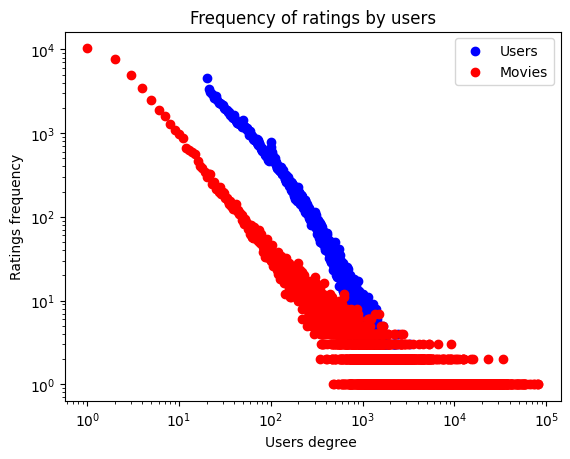

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import log

# Plotting the data distribution

user_degree = list(user_freq.keys())
ratings_by_user = list(user_freq.values())
movies_degree = list(movie_freq.keys())
ratings_by_movie = list(movie_freq.values())


plt.scatter(user_degree, ratings_by_user,marker='o', color='blue', label='Users')
plt.scatter(movies_degree, ratings_by_movie,marker='o', color='red', label='Movies')

plt.xscale('log')
plt.yscale('log')
plt.title('Frequency of ratings by users')
plt.xlabel('Users degree ')
plt.ylabel('Ratings frequency')
plt.legend()
plt.savefig('Data_Distrubtion_plot.pdf', format='pdf', bbox_inches='tight')
plt.show()


**Practical 2**

ALS with Biases only

In [ ]:
####### ALS with biases only 100k

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Set regularization parameters and iteration count
lambda_ = 0.1  # Regularization term for biases
gamma = 0.1   # Regularization term for biases
iterations = 10  # Number of iterations

# Initialize user and movie biases as zeros
movie_biases = np.zeros(len(ratings_by_movies_train))
user_biases = np.zeros(len(ratings_by_users_train))

# Store losses and RMSEs
train_losses = []
test_losses = []
Train_rmse = []
Test_rmse = []

# Function to calculate loss with regularization for biases only
def Calculate_Loss(ratings_train, user_biases, movie_biases, lambda_, gamma):
    log_likelihood_loss = 0

    # Squared error term
    for user_id, user_rating in enumerate(ratings_train):
        for movie_id, rating in user_rating:
            predicted = user_biases[user_id] + movie_biases[movie_id]
            error = rating - predicted
            log_likelihood_loss += (error) ** 2

    # Regularization term for user and movie biases
    user_bias_regularization = 0.5 * gamma * (user_biases ** 2).sum()
    movie_bias_regularization = 0.5 * gamma * (movie_biases ** 2).sum()

    # Final loss with regularization terms
    log_likelihood_loss += user_bias_regularization + movie_bias_regularization

    return log_likelihood_loss

# Function to compute RMSE
def compute_rmse(ratings_train, user_biases, movie_biases):
    total_error = 0
    count = 0

    for user_id, user_rating in enumerate(ratings_train):
        for movie_id, rating in user_rating:
            prediction = user_biases[user_id] + movie_biases[movie_id]
            error = rating - prediction
            total_error += error ** 2
            count += 1

    rmse = np.sqrt(total_error / count) if count > 0 else 0
    return rmse

# ALS iterations for biases only with print statements
for i in range(iterations):
    print(f"Iteration {i+1} starts...")

    # Loop over all users to update user biasoes
    for m in range(len(ratings_by_users_train)):  # Loop over all users

        bias_sum = 0
        item_counter = 0
        for movie, rating in ratings_by_users_train[m]:  # Loop over all ratings the user has

            if rating != 0:
                bias_sum += rating - movie_biases[movie]  # Update user bias based on movie bias
                item_counter += 1
        if item_counter > 0:
            user_biases[m] = bias_sum / (item_counter + lambda_)


    # Loop over all movies to update movie biases
    for n in range(len(ratings_by_movies_train)):  # Loop over all movies

        bias_sum = 0
        item_counter = 0
        for user, rating in ratings_by_movies_train[n]:  # Loop over all ratings the movie has

            if rating != 0:
                bias_sum += rating - user_biases[user]  # Update movie bias based on user bias
                item_counter += 1
        if item_counter > 0:
            movie_biases[n] = bias_sum / (item_counter + lambda_)


    # Calculate the loss
    train_loss = Calculate_Loss(ratings_by_users_train, user_biases, movie_biases, lambda_, gamma)
    test_loss = Calculate_Loss(ratings_by_users_test, user_biases, movie_biases, lambda_, gamma)

    train_rmse = compute_rmse(ratings_by_users_train, user_biases, movie_biases)
    test_rmse = compute_rmse(ratings_by_users_test, user_biases, movie_biases)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    Train_rmse.append(train_rmse)
    Test_rmse.append(test_rmse)

    print(f"Iteration {i+1}: Train RMSE = {train_rmse}, Test RMSE = {test_rmse}")
    print(f"Iteration {i+1} ends...\n")

# Plot the RMSE for training and test sets over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(Train_rmse)+1), Train_rmse, label="Train RMSE", marker='o')
plt.plot(range(1, len(Test_rmse)+1), Test_rmse, label="Test RMSE", marker='s')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('RMSE over Iterations (Biases Only)')
plt.legend()
plt.grid(True)
plt.savefig('Bias_only_rmse_plot.pdf', format='pdf', bbox_inches='tight')
plt.show()


Iteration 1 starts...


KeyboardInterrupt: 

In [ ]:
# Plot the RMSE for training and test sets over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_losses)+1), train_losses, label="Train Losses", marker='o')
#plt.plot(range(1, len(test_losses)+1), test_losses, label="Test RMSE", marker='s')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Losses over Iterations (Biases Only)')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'train_losses' is not defined

<Figure size 800x600 with 0 Axes>

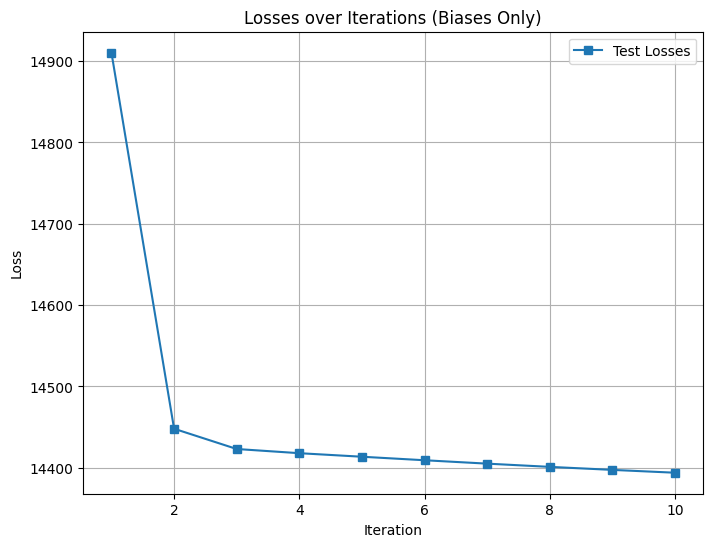

In [ ]:
# Plot the RMSE for training and test sets over iterations
plt.figure(figsize=(8, 6))
#plt.plot(range(1, len(train_losses)+1), train_losses, label="Train RMSE", marker='o')
plt.plot(range(1, len(test_losses)+1), test_losses, label="Test Losses", marker='s')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Losses over Iterations (Biases Only)')
plt.legend()
plt.grid(True)
plt.show()

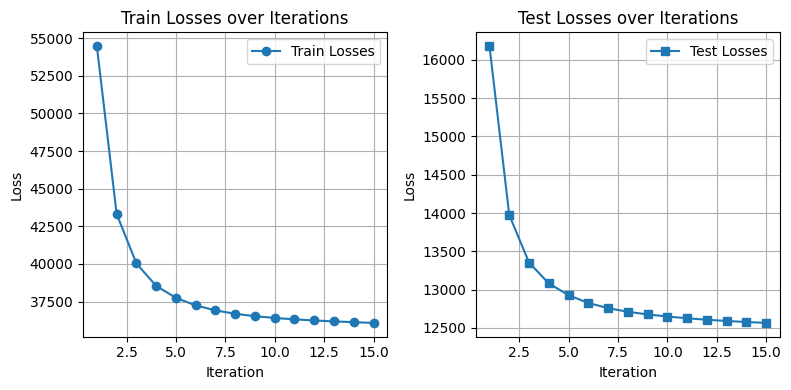

In [ ]:
import matplotlib.pyplot as plt

# Set up subplots with 1 row and 2 columns, side by side
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot for train losses
axs[0].plot(range(1, len(train_losses) + 1), train_losses, label="Train Losses", marker='o')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Loss')
axs[0].set_title('Train Losses over Iterations')
axs[0].legend()
axs[0].grid(True)

# Plot for test losses
axs[1].plot(range(1, len(test_losses) + 1), test_losses, label="Test Losses", marker='s')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Loss')
axs[1].set_title('Test Losses over Iterations')
axs[1].legend()
axs[1].grid(True)

# Show plots side by side
plt.tight_layout()
plt.savefig('Bias Only Loss_plot.pdf', format='pdf', bbox_inches='tight')
plt.show()


**Practical 3**

Computing ALS with biases and vectors.


Iteration 1 starts...
Iteration 1: Train RMSE = 0.8406349741434722, Test RMSE = 0.6886774905337503
Iteration 1 ends...


Iteration 2 starts...
Iteration 2: Train RMSE = 0.7683966003223082, Test RMSE = 0.6886774905337503
Iteration 2 ends...


Iteration 3 starts...
Iteration 3: Train RMSE = 0.7436862679400607, Test RMSE = 0.6886774905337503
Iteration 3 ends...


Iteration 4 starts...
Iteration 4: Train RMSE = 0.7318789784813154, Test RMSE = 0.6886774905337503
Iteration 4 ends...


Iteration 5 starts...
Iteration 5: Train RMSE = 0.725433560924479, Test RMSE = 0.6886774905337503
Iteration 5 ends...


Iteration 6 starts...
Iteration 6: Train RMSE = 0.7215709466615633, Test RMSE = 0.6886774905337503
Iteration 6 ends...


Iteration 7 starts...
Iteration 7: Train RMSE = 0.7191410838272394, Test RMSE = 0.6886774905337503
Iteration 7 ends...


Iteration 8 starts...
Iteration 8: Train RMSE = 0.7175685786985153, Test RMSE = 0.6886774905337503
Iteration 8 ends...


Iteration 9 starts...
Iteration 

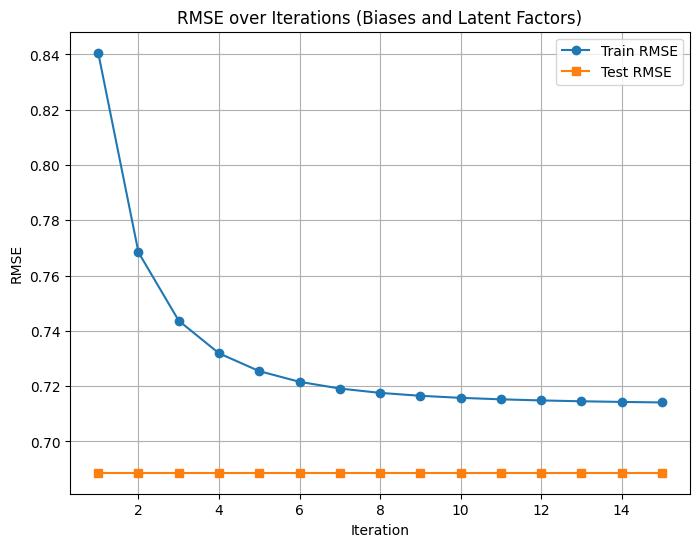

In [ ]:
###### ALS with biases and vectors 3 correct looping 2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import wandb
# wandb.init(project="ALS_with_biases_and_vectors", name="ALS_bias_latent_tracking")
lambda_ = 0.5
gamma = 0.5
tau = 4
iterations = 15
k = 10

#  user and movie biases initialization
movie_biases = np.zeros(len(ratings_by_movies))
user_biases = np.zeros(len(ratings_by_users))

#  user and movie vectors initialization
user_vectors = np.random.uniform(0, 1 / np.sqrt(k), (len(ratings_by_users), k))
movie_vectors = np.random.uniform(0, 1 / np.sqrt(k), (len(ratings_by_movies), k))


train_losses = []
test_losses = []
Train_rmse = []
Test_rmse = []

#  loss with regularization for biases and latent factors
def Calculate_Loss(ratings_users, user_biases, movie_biases, user_vectors, movie_vectors, lambda_, gamma, tau):
    log_likelihood_loss = 0

    # Squared error
    for user_id, user_rating in enumerate(ratings_users):
        for movie_id, rating in user_rating:
            predicted = np.dot(user_vectors[user_id], movie_vectors[movie_id]) + user_biases[user_id] + movie_biases[movie_id]
            error = rating - predicted
            log_likelihood_loss += (error) ** 2


    user_bias_regularization = 0.5 * gamma * (user_biases ** 2).sum()
    movie_bias_regularization = 0.5 * gamma * (movie_biases ** 2).sum()

    user_vector_regularization = 0.5 * lambda_ * (user_vectors ** 2).sum()
    movie_vector_regularization = 0.5 * lambda_ * (movie_vectors ** 2).sum()

    log_likelihood_loss += user_bias_regularization + movie_bias_regularization
    log_likelihood_loss += user_vector_regularization + movie_vector_regularization

    return log_likelihood_loss

#  RMSE
def compute_rmse(ratings_users, user_biases, movie_biases, user_vectors, movie_vectors):
    total_error = 0
    count = 0

    for user_id, user_rating in enumerate(ratings_users):
        for movie_id, rating in user_rating:
            prediction = np.dot(user_vectors[user_id], movie_vectors[movie_id]) + user_biases[user_id] + movie_biases[movie_id]
            error = rating - prediction
            total_error += error ** 2
            count += 1

    rmse = np.sqrt(total_error / count) if count > 0 else 0
    return rmse
patience = 5  # Number of iterations with no improvement before stopping
best_test_loss = float('inf')
patience_counter = 0

# ALS iterations with biases and latent factors
for i in range(iterations):
    print(f"\nIteration {i+1} starts...")



    #  update user biases
    for m in range(len(ratings_by_users)):
        bias_sum = 0
        item_counter = 0
        for movie, rating in ratings_by_users[m]:
            if rating != 0:
                bias_sum += rating - movie_biases[movie] - np.dot(user_vectors[m], movie_vectors[movie])
                item_counter += 1
        if item_counter > 0:
            user_biases[m] = bias_sum / (item_counter + lambda_)



        # update user latent factors
    for m in range(len(ratings_by_users)):
        rated_movies = [entry for entry in ratings_by_users[m] if entry[1] != 0]  # List of movies rated by user m
        if rated_movies:
            V_T_V = np.dot(movie_vectors[[movie for movie, _ in rated_movies]].T,
                          movie_vectors[[movie for movie, _ in rated_movies]]) + tau * np.eye(k)
            right_term = np.dot(movie_vectors[[movie for movie, _ in rated_movies]].T,
                                [rating - movie_biases[movie] - user_biases[m] for movie, rating in rated_movies])
            user_vectors[m] = np.linalg.solve(V_T_V + lambda_ * np.eye(k), right_term)



    #  update movie biases
    for n in range(len(ratings_by_movies)):
        bias_sum = 0
        item_counter = 0
        for user, rating in ratings_by_movies[n]:
            if rating != 0:
                bias_sum += rating - user_biases[user] - np.dot(user_vectors[user], movie_vectors[n])
                item_counter += 1
        if item_counter > 0:
            movie_biases[n] = bias_sum / (item_counter + lambda_)





      # Update movie latent factors
    for n in range(len(ratings_by_movies)):
        rated_users = [entry for entry in ratings_by_movies[n] if entry[1] != 0]  # List of users who rated movie n
        if rated_users:
            U_T_U = np.dot(user_vectors[[user for user, _ in rated_users]].T,
                          user_vectors[[user for user, _ in rated_users]]) + tau * np.eye(k)
            right_term = np.dot(user_vectors[[user for user, _ in rated_users]].T,
                                [rating - user_biases[user] - movie_biases[n] for user, rating in rated_users])
            movie_vectors[n] = np.linalg.solve(U_T_U + lambda_ * np.eye(k), right_term)


    # Calculate the loss
    train_loss = Calculate_Loss(ratings_by_users, user_biases, movie_biases, user_vectors, movie_vectors, lambda_, gamma, tau)
    #test_loss = Calculate_Loss(ratings_by_users_test, user_biases, movie_biases, user_vectors, movie_vectors, lambda_, gamma, tau)
    # wandb.log({
    #     "Train Loss": train_loss})
    # wandb.log({
    #     "Test Loss": test_loss})
    train_rmse = compute_rmse(ratings_by_users, user_biases, movie_biases, user_vectors, movie_vectors)
    #test_rmse = compute_rmse(ratings_by_users_test, user_biases, movie_biases, user_vectors, movie_vectors)
    # wandb.log({
    #     "Train RMSE": train_rmse})
    # wandb.log({
    #     "Test RMSE": test_rmse})
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    Train_rmse.append(train_rmse)
    Test_rmse.append(test_rmse)
    # wandb.log({

    #     "Iteration": i + 1
    # })


    print(f"Iteration {i+1}: Train RMSE = {train_rmse}, Test RMSE = {test_rmse}")
    print(f"Iteration {i+1} ends...\n")

# Plot the RMSE for training and test sets over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(Train_rmse)+1), Train_rmse, label="Train RMSE", marker='o')
plt.plot(range(1, len(Test_rmse)+1), Test_rmse, label="Test RMSE", marker='s')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('RMSE over Iterations (Biases and Latent Factors)')
plt.legend()
plt.grid(True)
# wandb.log({"RMSE Plot": plt})

plt.savefig('ALS_rmse_plot.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# # Save to a specific folder in your Google Drive
# plt.savefig('/content/drive/My Drive/rmse_plot.pdf', format='pdf')


In [ ]:
# # Load the movies data
# movies = pd.read_csv('/content/movies.csv')

# # Function to get the movie index for a given title
# def get_movie_index_by_title(title):
#     # Find the row in movies.csv where the title matches
#     movie_row = movies[movies['title'].str.contains(title, case=False, na=False)]
#     if movie_row.empty:
#         print(f"Movie '{title}' not found.")
#         return None
#     else:
#         # Get the movieId of the matched title
#         movie_id = movie_row.iloc[0]['movieId']
#         # Map movie_id to the index used in the ALS model
#         if movie_id in movie_to_idx:
#             return movie_to_idx[movie_id]
#         else:
#             print(f"Movie ID {movie_id} for '{title}' not found in mapping.")
#             return None

# # Example usage
# movie_title = "Harry Potter and the Chamber of Secrets"
# movie_index = get_movie_index_by_title(movie_title)
# print(f"Index for '{movie_title}':", movie_index)


In [ ]:
# import pandas as pd
# import numpy as np

# # Step 1: Load the movies data and create the function to get the movie index by title
# movies = pd.read_csv('/content/movies.csv')

# # Function to get the movie index for a given title
# def get_movie_index_by_title(title):
#     # Find the row in movies.csv where the title matches
#     movie_row = movies[movies['title'].str.contains(title, case=False, na=False)]
#     if movie_row.empty:
#         print(f"Movie '{title}' not found.")
#         return None
#     else:
#         # Get the movieId of the matched title
#         movie_id = movie_row.iloc[0]['movieId']
#         # Map movie_id to the index used in the ALS model
#         if movie_id in movie_to_idx:
#             return movie_to_idx[movie_id]
#         else:
#             print(f"Movie ID {movie_id} for '{title}' not found in mapping.")
#             return None

# # Example usage to get the index for the movie you want to use for the dummy user
# movie_title = "Harry Potter and the Chamber of Secrets"
# target_movie_index = get_movie_index_by_title(movie_title)
# print(f"Index for '{movie_title}':", target_movie_index)

# # Step 2: Create a dummy user and get recommendations
# if target_movie_index is not None:
#     # Initialize dummy user vector and bias
#     dummy_user_vector = np.zeros(k)  # Initialize with zeros
#     dummy_user_bias = 0.0

#     # Dummy user's single rating for "The Lord of the Rings"
#     dummy_user_ratings = [(target_movie_index, 5.0)]  # User rates the movie 5 stars

#     # Update the dummy user's latent factors
#     def update_dummy_user_vector(dummy_user_vector, dummy_user_bias, dummy_user_ratings):
#         for movie_index, rating in dummy_user_ratings:
#             V_T_V = np.dot(movie_vectors[movie_index].T, movie_vectors[movie_index]) + tau * np.eye(k)
#             right_term = movie_vectors[movie_index] * (rating - movie_biases[movie_index] - dummy_user_bias)
#             dummy_user_vector = np.linalg.solve(V_T_V + lambda_ * np.eye(k), right_term)
#         return dummy_user_vector

#     # Update the dummy user's vector
#     dummy_user_vector = update_dummy_user_vector(dummy_user_vector, dummy_user_bias, dummy_user_ratings)

#     # Generate recommendations
#     def get_recommendations(dummy_user_vector, num_recommendations=10):
#         scores = []
#         for movie_idx in range(len(movie_vectors)):
#             if movie_idx == target_movie_index:
#                 continue  # Skip the movie already rated by the dummy user
#             score = np.dot(dummy_user_vector, movie_vectors[movie_idx]) + 0.05 * movie_biases[movie_idx]
#             scores.append((movie_idx, score))

#         # Sort movies by score in descending order and get top recommendations
#         top_recommendations = sorted(scores, key=lambda x: x[1], reverse=True)[:num_recommendations]

#         # Convert internal indices back to movie titles
#         recommendations = [(id_to_movie[movie_idx], score) for movie_idx, score in top_recommendations]
#         return recommendations

#     # Get recommendations for the dummy user
#     recommendations = get_recommendations(dummy_user_vector)

#     # Print recommendations with titles
#     print("Top Recommendations for the Dummy User:")
#     for movie_id, score in recommendations:
#         movie_title = movies[movies['movieId'] == movie_id]['title'].values[0]
#         print(f"{movie_title} - Score: {score:.2f}")
# else:
#     print("Target movie index not found; cannot generate recommendations.")


**Practical 4**

Creating a dummy user to test the recommendtion system.

In [ ]:
import pandas as pd
import numpy as np

# Set constants
k = 10 # number of latent factors
tau = 4  # regularization parameter for vectors
lambda_ = 0.5  # regularization term for biases

# Step 1: Load the movies data and create the function to get the movie index by title
movies = pd.read_csv('/content/movies.csv')

# Function to get the movie index for a given title
def get_movie_index_by_title(title):
    # Find the row in movies.csv where the title matches
    movie_row = movies[movies['title'].str.contains(title, case=False, na=False, regex=False)]
    if movie_row.empty:
        print(f"Movie '{title}' not found.")
        return None
    else:
        # Get the movieId of the matched title
        movie_id = movie_row.iloc[0]['movieId']
        # Map movie_id to the index used in the ALS model
        if movie_id in movie_to_idx:
            return movie_to_idx[movie_id]
        else:
            print(f"Movie ID {movie_id} for '{title}' not found in mapping.")
            return None

# Example usage to get the index for the movie you want to use for the dummy user
movie_title = "Avengers: Age of Ultron (2015)"
target_movie_index = get_movie_index_by_title(movie_title)
print(f"Index for '{movie_title}':", target_movie_index)

# Step 2: Create a dummy user and get recommendations
if target_movie_index is not None:
    # Initialize dummy user vector and bias
    dummy_user_vector = np.zeros(k)  # Initialize with zeros
    dummy_user_bias = 0.0

    # Dummy user's single rating for the chosen movie
    dummy_user_ratings = [(target_movie_index, 5.0)]  # User rates the movie 5 stars

    # Function to update dummy user vector and bias together
    def update_dummy_user_vector_and_bias(dummy_user_vector, dummy_user_bias, dummy_user_ratings, num_updates=5):
        for _ in range(num_updates):  # Run multiple updates for refinement
            # First, update the dummy user bias
            bias_sum = 0
            item_counter = len(dummy_user_ratings)

            for movie_index, rating in dummy_user_ratings:
                bias_sum += rating - movie_biases[movie_index] - np.dot(dummy_user_vector, movie_vectors[movie_index])

            if item_counter > 0:
                dummy_user_bias = bias_sum / (item_counter + lambda_)  # Update bias

            # Then, update the dummy user vector based on the new bias
            for movie_index, rating in dummy_user_ratings:
                V_T_V = np.dot(movie_vectors[movie_index].T, movie_vectors[movie_index]) + tau * np.eye(k)
                right_term = movie_vectors[movie_index] * (rating - movie_biases[movie_index] - dummy_user_bias)
                dummy_user_vector = np.linalg.solve(V_T_V + lambda_ * np.eye(k), right_term)

        return dummy_user_vector, dummy_user_bias

    # Run the function to update both vector and bias multiple times
    dummy_user_vector, dummy_user_bias = update_dummy_user_vector_and_bias(
        dummy_user_vector, dummy_user_bias, dummy_user_ratings, num_updates=5
    )

# Now, dummy_user_vector and dummy_user_bias are both updated and can be used for personalized recommendations.

    # Generate recommendations
    def get_recommendations(dummy_user_vector, num_recommendations=10):
        scores = []
        for movie_idx in range(len(movie_vectors)):
            if movie_idx == target_movie_index:
                continue  # Skip the movie already rated by the dummy user
            score = np.dot(dummy_user_vector, movie_vectors[movie_idx]) + 0.05 * movie_biases[movie_idx]
            scores.append((movie_idx, score))

        # Sort movies by score in descending order and get top recommendations
        top_recommendations = sorted(scores, key=lambda x: x[1], reverse=True)[:num_recommendations]

        # Convert internal indices back to movie titles
        recommendations = [(id_to_movie[movie_idx], score) for movie_idx, score in top_recommendations]
        return recommendations

    # Get recommendations for the dummy user
    recommendations = get_recommendations(dummy_user_vector)

    # Print recommendations with titles
    print("Top Recommendations for the Dummy User:")
    for movie_id, score in recommendations:
        movie_title = movies[movies['movieId'] == movie_id]['title'].values[0]
        print(f"{movie_title} - Score: {score:.2f}")
else:
    print("Target movie index not found; cannot generate recommendations.")


Index for 'Avengers: Age of Ultron (2015)': 791
Top Recommendations for the Dummy User:
Avengers: Infinity War - Part I (2018) - Score: 56.88
Avengers: Infinity War - Part II (2019) - Score: 55.98
Avengers, The (2012) - Score: 54.87
Captain America: Civil War (2016) - Score: 54.20
Captain America: The Winter Soldier (2014) - Score: 53.64
Thor: Ragnarok (2017) - Score: 50.83
Untitled Spider-Man Reboot (2017) - Score: 46.62
Captain America: The First Avenger (2011) - Score: 46.23
Deadpool (2016) - Score: 44.47
Iron Man 3 (2013) - Score: 44.00
